# **🌐 FIAP x DASA CHALLENGE 2025 - SPRINT 3**
## 🐍 Dynamic Programing

## 🧩 **DESAFIO:** Baixa Visibilidade no Apontamento de Consumo nas Unidades

### **👥 Integrantes:**

```
RM 557709 | Augusto Ferreira Rogel de Souza             (2ESA)
RM 554823 | Heitor Anderson Prestes de Oliveira Filho   (2ESA)
RM 556668 | Lucca Ribeiro Cardinale                     (2ESA)
RM 554445 | Mohamed Afif                                (2ESA)
RM 554736 | Rafael Federici de Oliveira                 (2ESPH)
```

### **🎯 Objetivo do Relatório:**
Comparar a eficiência dos algoritmos de busca e ordenação utilizados no projeto **"Gerênciamento de Estoque"**:

- **🔎 Algoritimos de Busca**
    - Busca Sequêncial
    - Busca Binária

- **🔃 Algoritimos de Ordenação**
    - Selection Sort
    - Merge Sort
    - Quick Sort

## **⬇️ IMPORTS:**

In [1]:
from utils.decorators import *
from utils.buscas import *
from utils.ordenacoes import *
import random
import pandas as pd
import matplotlib.pyplot as plt

## **📋 TESTES:**

In [2]:
# Listas de teste
lista_testes = {
    "Pequena": random.sample(range(1000), 100),
    "Média": random.sample(range(10000), 1000),
    "Grande": random.sample(range(100000), 10000)
}

# Algoritmos a serem testados
ordenacoes = {
    "Selection Sort": selectionSort,
    "Merge Sort": mergeSort,
    "Quick Sort": quickSort
}

buscas = {
    "Sequencial": buscaSequencial,
    "Binaria": buscaBinaria
}

## **▶️ EXECUÇÃO:**

In [3]:
resultados = []

# Teste de Ordenações
for nome_lista, lista in lista_testes.items():
    for nome_algoritmo, func in ordenacoes.items():
        dados = executar(func, lista)
        resultados.append({
            "Categoria": "Ordenação",
            "Algoritmo": nome_algoritmo,
            "Lista": nome_lista,
            "Tempo (ms)": dados['tempo'],
            "Memória (KB)": dados['memoria']
        })

# Teste de Buscas (em listas ordenadas)
for nome_lista, lista in lista_testes.items():
    lista_ordenada = sorted(lista)
    valor = lista_ordenada[len(lista_ordenada)//2]  # valor do meio
    for nome_algoritmo, func in buscas.items():
        dados = executar(func, lista_ordenada, valor)
        resultados.append({
            "Categoria": "Busca",
            "Algoritmo": nome_algoritmo,
            "Lista": nome_lista,
            "Tempo (ms)": dados['tempo'],
            "Memória (KB)": dados['memoria']
        })

df = pd.DataFrame(resultados)
df

,Categoria,Algoritmo,Lista,Tempo (ms),Memória (KB)
0,Ordenação,Selection Sort,Pequena,0.2178,0.890625
1,Ordenação,Merge Sort,Pequena,0.1022,1.570312
2,Ordenação,Quick Sort,Pequena,0.1070,3.039062
3,Ordenação,Selection Sort,Média,12.0154,7.996094
4,Ordenação,Merge Sort,Média,0.7950,15.656250
5,Ordenação,Quick Sort,Média,0.6854,24.906250
6,Ordenação,Selection Sort,Grande,1071.1811,78.308594
7,Ordenação,Merge Sort,Grande,10.8905,156.437500
8,Ordenação,Quick Sort,Grande,9.3533,244.320312
9,Busca,Sequencial,Pequena,0.0032,0.117188


## **📊 GRÁFICOS:**

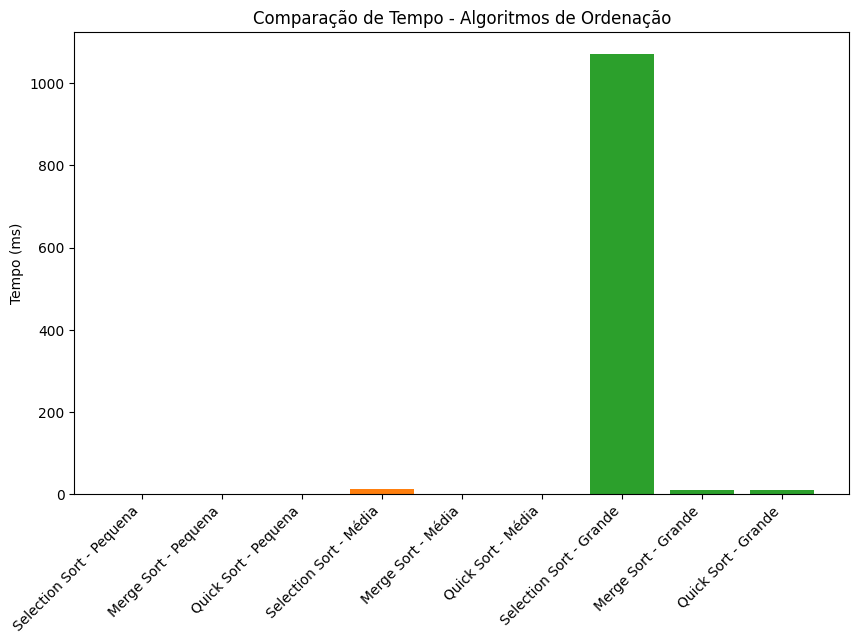

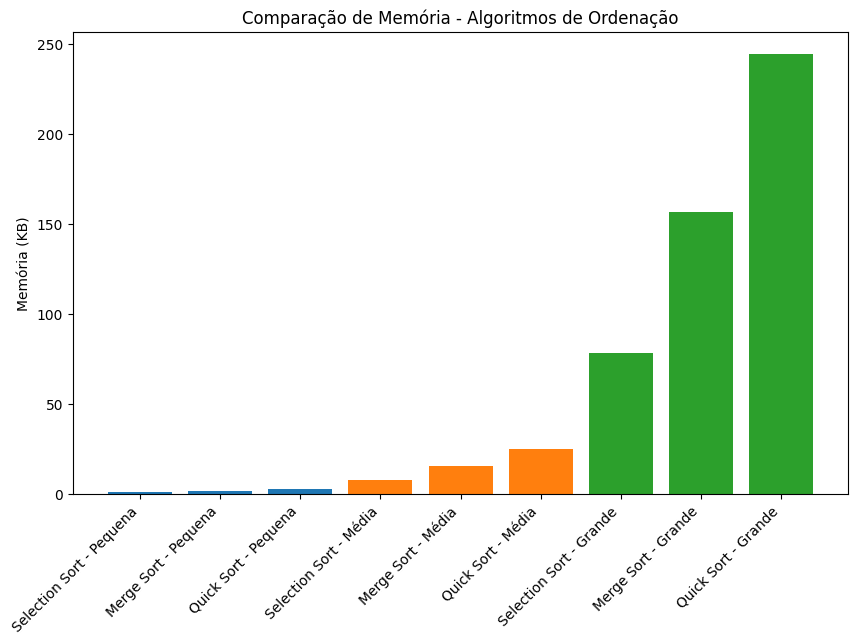

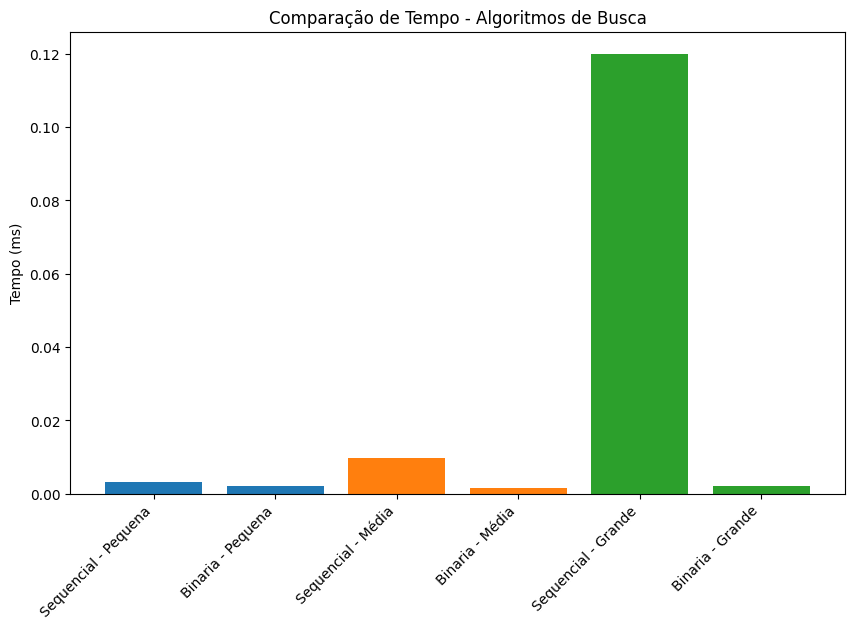

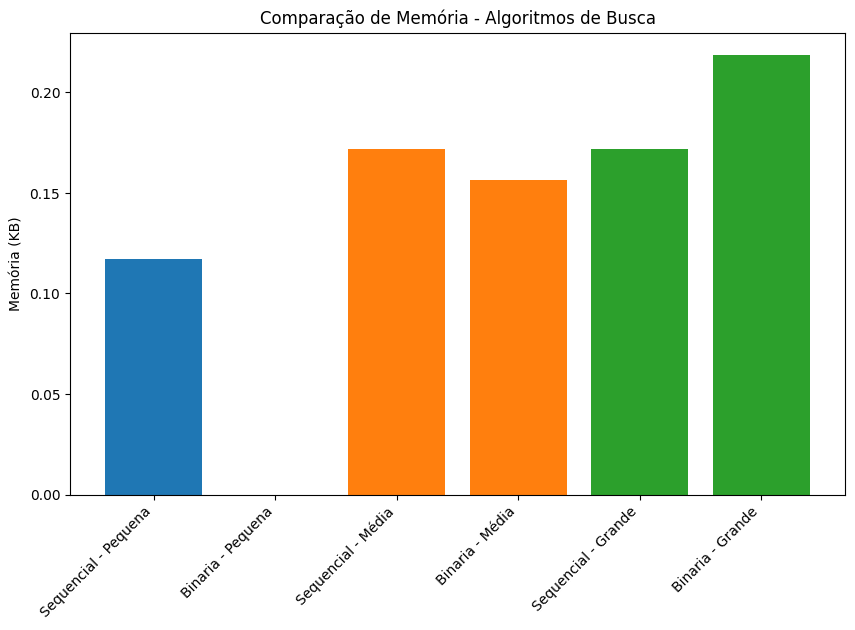

In [4]:
# Gráfico de Ordenação - Tempo
df_ord = df[df['Categoria'] == 'Ordenação']
plt.figure(figsize=(10,6))
for nome_lista in df_ord['Lista'].unique():
    subset = df_ord[df_ord['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Tempo (ms)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tempo (ms)")
plt.title("Comparação de Tempo - Algoritmos de Ordenação")
plt.show()

# Gráfico de Ordenação - Memória
plt.figure(figsize=(10,6))
for nome_lista in df_ord['Lista'].unique():
    subset = df_ord[df_ord['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Memória (KB)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Memória (KB)")
plt.title("Comparação de Memória - Algoritmos de Ordenação")
plt.show()

# Gráfico de Busca - Tempo
df_busca = df[df['Categoria'] == 'Busca']
plt.figure(figsize=(10,6))
for nome_lista in df_busca['Lista'].unique():
    subset = df_busca[df_busca['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Tempo (ms)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tempo (ms)")
plt.title("Comparação de Tempo - Algoritmos de Busca")
plt.show()

# Gráfico de Busca - Memória
plt.figure(figsize=(10,6))
for nome_lista in df_busca['Lista'].unique():
    subset = df_busca[df_busca['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Memória (KB)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Memória (KB)")
plt.title("Comparação de Memória - Algoritmos de Busca")
plt.show()


## 🧠 Análise

- **🔎 Algoritimos de Busca**
    - Busca Sequêncial → simples, mas ineficiente em listas grandes.
    - Busca Binária → muito eficiente (O(log n)), ideal para listas ordenadas.

- **🔃 Algoritimos de Ordenação**
    - Selection Sort → útil apenas para listas pequenas.
    - Merge Sort → estável e eficiente para qualquer tamanho.
    - Quick Sort → mais rápido em listas grandes, mas consome um pouco mais de memória.

✅ **Conclusão:**
- Para **ordenar listas grandes**, a melhor opção é o **Quick Sort** (ou Merge Sort se precisar de estabilidade).
- Para **buscar em listas grandes**, a melhor opção é o **Busca Binária**.
- Para listas pequenas, qualquer algoritmo atende, mas Selection Sort e Sequencial só são justificáveis por didática.